# **Análise Comparativa de Modelos**

## **Visão Geral do Notebook**

Neste notebook, buscamos prever a sobrevivência dos passageiros do **Titanic** utilizando o conjunto de dados disponível no **[Kaggle](https://www.kaggle.com/c/titanic/data)**. A metodologia seguiu etapas de obtenção, preparação e modelagem dos dados, começando pela limpeza e transformação, incluindo imputação de valores faltantes, codificação de variáveis categóricas, normalização de variáveis numéricas e tratamento de outliers. 

Em seguida, treinamos e comparamos quatro modelos preditivos: Regressão Logística, Random Forest, Support Vector Machine (SVM) e K-Nearest Neighbors (KNN), usando validação cruzada para garantir a robustez dos resultados. Este estudo visa identificar o modelo mais eficaz para prever a sobrevivência dos passageiros com base em suas características demográficas e socioeconômicas.

## **Metodologia**

Neste estudo, o objetivo é prever a sobrevivência dos passageiros a bordo do RMS Titanic com base em diversas características demográficas e socioeconômicas. O conjunto de dados do **Titanic**, está disponível no **[Kaggle](https://www.kaggle.com/c/titanic/data)**. A metodologia adotada foi estruturada em várias etapas: **obtenção de dados**, **preparação dos dados**, **modelagem preditiva**, e **validação dos modelos**.
    
**Obtenção de Dados:**

   - Nesta etapa, carregamos e exploramos o conjunto de dados Titanic para conhecer suas principais características. O dataset inclui informações sobre os passageiros, como idade, gênero, classe e tarifa paga. Usamos essas informações para prever se os passageiros sobreviveram ou não.

**Preparação de Dados:**

   - A preparação dos dados envolve a limpeza e transformação necessárias para garantir que os dados estejam prontos para a modelagem. Isso inclui:
   
     - **Tratamento de dados faltantes:** Onde as colunas com valores faltantes foram tratadas utilizando métodos específicos. A coluna `'deck'` foi removida devido ao grande número de valores ausentes. Para as variaveis contínuas foi utilizada a média e para as variáveis nominais foi utilizada a moda.
          
     - **Codificação de variáveis:** As variáveis nominais foram codificadas com o OneHotEncoder, que as transforma em colunas binárias (0 ou 1). A opção drop='first' foi usada para excluir a primeira categoria de cada variável, evitando multicolinearidade e reduzindo o número de colunas.
     
     - **Normalização de variáveis:** As variáveis numéricas foram identificadas e selecionadas para normalização utilizando o `StandardScaler` do Scikit-Learn. O scaler foi aplicado para transformar as colunas selecionadas, resultando em um DataFrame com valores normalizados..

     - **Tratamento de outliers:** Os outliers foi identificados, porém optou-se por não removê-los pois poderia ocasionar distorções na análise.

**Modelagem Preditiva:**

- Quatro modelos foram treinados para prever a sobrevivência:

  - **K-Nearest Neighbors (KNN)**: Um modelo intuitivo que classifica um ponto de dados com base na proximidade dos seus vizinhos mais próximos. Embora simples, ele pode ser poderoso em cenários com padrões claros, mas é sensível a outliers e ao ruído.
  
  - **Gradient Boosting:** Um modelo que combina várias árvores de decisão fracas para melhorar a precisão, corrigindo erros de forma sequencial. Eficaz para classificações complexas, mas requer cuidado com o overfitting.
  
  - **Decision Tree:** Um modelo que usa uma estrutura em árvore para dividir dados com base em atributos, criando um caminho de decisões para prever classes ou valores. É fácil de interpretar e captura relações não lineares, mas pode sofrer com overfitting e variações nos dados.
  
  - **Random Forest Classifier**: Um modelo avançado que combina múltiplas árvores de decisão (ensemble) para melhorar a precisão e reduzir o risco de overfitting. Ele funciona bem em dados com muitas variáveis e interações complexas.
  

**Validação dos Modelos:**

- A validação cruzada com k-fold (k=5) foi usada para garantir resultados mais confiáveis e aplicáveis. Isso permite avaliar cada modelo em diferentes partes do conjunto de dados, evitando depender de apenas uma divisão específica dos dados.

**Este notebook é uma ferramenta prática para aprender e aplicar técnicas de machine learning em problemas parecidos. No final, queremos encontrar o melhor modelo para o conjunto de dados [Titanic](https://www.kaggle.com/c/titanic/data) e obter dicas úteis sobre como escolher algoritmos para problemas de classificação.**

### **1. Obtenção de dados**

#### **1.1. Configuração do Ambiente: Importação das Bibliotecas**

In [96]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from IPython.display import display, Markdown
from IPython.display import HTML, display

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit, GridSearchCV, KFold, cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats

* São importadas diversas bibliotecas essenciais para análise de dados, visualização, pré-processamento e construção de modelos de machine learning. Inclui `pandas` para manipulação de dados, `matplotlib` e `seaborn` para visualização gráfica, e `numpy` para operações numéricas. 

* Ferramentas de pré-processamento do Scikit-Learn, como `Pipeline`, imputation, scalers, e codificadores, são usadas para preparar os dados, enquanto modelos como `LogisticRegression` e `RandomForestClassifier` são importados para tarefas de classificação. 

* Também são importados métodos para validação cruzada e busca de hiperparâmetros, como `GridSearchCV` e `KFold`.

#### **1.2. Carregamento dos Dados e Inspeção Inicial**

In [108]:
# Exibição da descrição do conjunto de dados

display(Markdown(
    "---\n"
    "O conjunto de dados **Titanic**, utilizado neste estudo, foi obtido da plataforma **[Kaggle](https://www.kaggle.com/c/titanic/data)**, mas também está disponível em outras fontes. Este dataset é amplamente reconhecido e utilizado para análises exploratórias de dados e projetos de aprendizado de máquina devido às informações detalhadas que fornece sobre os passageiros do RMS Titanic."
    "\n\n"
    "O Titanic afundou na noite de 15 de abril de 1912 após colidir com um iceberg, resultando na perda de muitas vidas. O dataset inclui dados abrangentes sobre os passageiros, como informações de embarque e sobrevivência, permitindo realizar diversas análises e modelagens preditivas relacionadas a este evento histórico trágico."
    "\n\n"
    "No conjunto de dados, a variável dependente é **`Survived`**, e as variáveis preditoras são: **`Pclass`**, **`Sex`**, **`Age`**, **`SibSp`**, **`Parch`**, **`Fare`**, **`Embarked`**, **`Class`**, **`Who`**, **`Adult_male`**, **`Deck`**, **`Embark_town`**, **`Alive`**, e **`Alone`**."
    "\n\n"
))

# Carregamento dos dados do arquivo CSV

df = pd.read_csv("../data/raw/titanic.csv")
display(df.head())

---
O conjunto de dados **Titanic**, utilizado neste estudo, foi obtido da plataforma **[Kaggle](https://www.kaggle.com/c/titanic/data)**, mas também está disponível em outras fontes. Este dataset é amplamente reconhecido e utilizado para análises exploratórias de dados e projetos de aprendizado de máquina devido às informações detalhadas que fornece sobre os passageiros do RMS Titanic.

O Titanic afundou na noite de 15 de abril de 1912 após colidir com um iceberg, resultando na perda de muitas vidas. O dataset inclui dados abrangentes sobre os passageiros, como informações de embarque e sobrevivência, permitindo realizar diversas análises e modelagens preditivas relacionadas a este evento histórico trágico.

No conjunto de dados, a variável dependente é **`Survived`**, e as variáveis preditoras são: **`Pclass`**, **`Sex`**, **`Age`**, **`SibSp`**, **`Parch`**, **`Fare`**, **`Embarked`**, **`Class`**, **`Who`**, **`Adult_male`**, **`Deck`**, **`Embark_town`**, **`Alive`**, e **`Alone`**.



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### **1.3. Dicionário de dados**

In [115]:
# Carregamento do dicionário de dados

df_dict = pd.read_csv("../data/external/dictionary.csv")
display(df_dict)

display(Markdown(
    "---\n"
    "O conjunto de dados inclui 15 variáveis, sendo:"
    "\n\n"
    
    "- **8** qualitativas nominais"
    "\n\n"
    
    "- **3** qualitativas ordinais"
    "\n\n"
    
    "- **2** quantitativas discretas"
    "\n\n"
    
    "- **2** quantitativas contínuas"
    "\n\n" 
))

,variavel,descrição,tipo,subtipo
0,survived,Indica se o passageiro sobreviveu (sim = 1 ou ...,qualitativa,nominal
1,pclass,"Classe do ticket do passageiro (1 = 1ª, 2 = 2ª...",qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Número de irmãos/cônjuges a bordo,quantitativa,discreta
5,parch,Número de pais/filhos a bordo,quantitativa,discreta
6,fare,Tarifa paga pelo passageiro,quantitativa,contínua
7,embarked,Porto de embarque (C = Cherbourg; Q = Queensto...,qualitativa,nominal
8,class,"Classe do ticket (Primeira, Segunda, Terceira)",qualitativa,ordinal
9,who,"Descrição da pessoa (homem, mulher, criança)",qualitativa,nominal


---
O conjunto de dados inclui 15 variáveis, sendo:

- **8** qualitativas nominais

- **3** qualitativas ordinais

- **2** quantitativas discretas

- **2** quantitativas contínuas



#### **1.4. Informações gerais do Quadro de Dados**

In [118]:
# Resumo das informações do DataFrame

df.info()

display(Markdown(
    "---\n"
    "* O DataFrame contém **891** entradas e **15** colunas. As colunas possuem diferentes tipos de dados: **`int64`** (4 colunas), **`float64`** (2 colunas), **`object`** (7 colunas) e **`bool`** (2 colunas). Algumas colunas apresentam valores ausentes, como **`age`** (177 ausentes), **`embarked`** (2 ausentes), **`deck`** (688 ausentes) e **`embark_town`** (2 ausentes)."
    "\n\n"
))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


---
* O DataFrame contém **891** entradas e **15** colunas. As colunas possuem diferentes tipos de dados: **`int64`** (4 colunas), **`float64`** (2 colunas), **`object`** (7 colunas) e **`bool`** (2 colunas). Algumas colunas apresentam valores ausentes, como **`age`** (177 ausentes), **`embarked`** (2 ausentes), **`deck`** (688 ausentes) e **`embark_town`** (2 ausentes).



#### **1.5. Estatística descritiva do conjunto de dados**

In [119]:
# Visualizar a estatística descritiva do conjunto de dados

df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* O conjunto de dados do Titanic contém 891 entradas e 15 colunas, incluindo variáveis numéricas e categóricas. Cerca de 38% dos passageiros sobreviveram, a maioria estava na terceira classe, e a idade média dos passageiros era de 29,7 anos. A maioria era do sexo masculino e embarcou em Southampton. Algumas colunas, como `age`, `deck` e `embark_town`, possuem valores ausentes. As tarifas pagas variam amplamente, com uma média de 32,2 e um valor máximo de 512,33.

### **2. Preparação de dados**

#### **2.1. Preparação das Variáveis para Análise**

In [120]:
# Remover as colunas indesejadas

columns_to_remove = ['who', 'deck', 'alive', 'embarked', 'class']

df = df.drop(columns=columns_to_remove, axis=1)

# Atualizar o dicionário de variáveis se necessário

df_dict = df_dict[~df_dict['variavel'].isin(columns_to_remove)]

# Definição da variável alvo

target_column = 'survived'

# Variáveis Nominais

nominal_columns = (
    df_dict
    .query("subtipo == 'nominal' and variavel != @target_column")
    .variavel
    .tolist()
)

# Variáveis Ordinais

ordinal_columns = (
    df_dict
    .query("subtipo == 'ordinal'")
    .variavel
    .tolist()
)

# Variáveis Discretas

discrete_columns = (
    df_dict
    .query("subtipo == 'discreta'")
    .variavel
    .tolist()
)

# Variáveis Contínuas
continuous_columns = (
    df_dict
    .query("subtipo == 'continua'")
    .variavel
    .tolist()
)
    
display(Markdown(
    f"- **Variável-alvo:** {target_column} \n\n"
    f"- **Variáveis qualitativas nominais:** {nominal_columns} \n"    
    f"- **Variáveis qualitativa ordinais:** {ordinal_columns} \n"
    f"- **Variáveis quantitativas discretas:** {discrete_columns} \n" 
    f"- **Variáveis quantitativas contínuas:** {continuous_columns} \n"
    "---"
))

# Isolando a variável-alvo das variáveis preditoras

X = df.drop(columns=[target_column], axis=1)
y = df[target_column]

- **Variável-alvo:** survived 

- **Variáveis qualitativas nominais:** ['sex', 'adult_male', 'embark_town', 'alone'] 
- **Variáveis qualitativa ordinais:** ['pclass'] 
- **Variáveis quantitativas discretas:** ['sibsp', 'parch'] 
- **Variáveis quantitativas contínuas:** [] 
---

In [121]:
# Contagem do Número Total de Variáveis

num_variables = len(df.columns)
print(f"Número total de variáveis: {num_variables}")

Número total de variáveis: 10


#### **2.2. Identificação e Visualização de Outliers usando o Método do IQR**

Número de outliers por coluna: 

parch    213
fare     116
sibsp     46
age       11
dtype: int64


,parch,fare,sibsp,age
0,0,7.2500,1,22.0
1,0,71.2833,1,38.0
2,0,7.9250,0,26.0
3,0,53.1000,1,35.0
4,0,8.0500,0,35.0


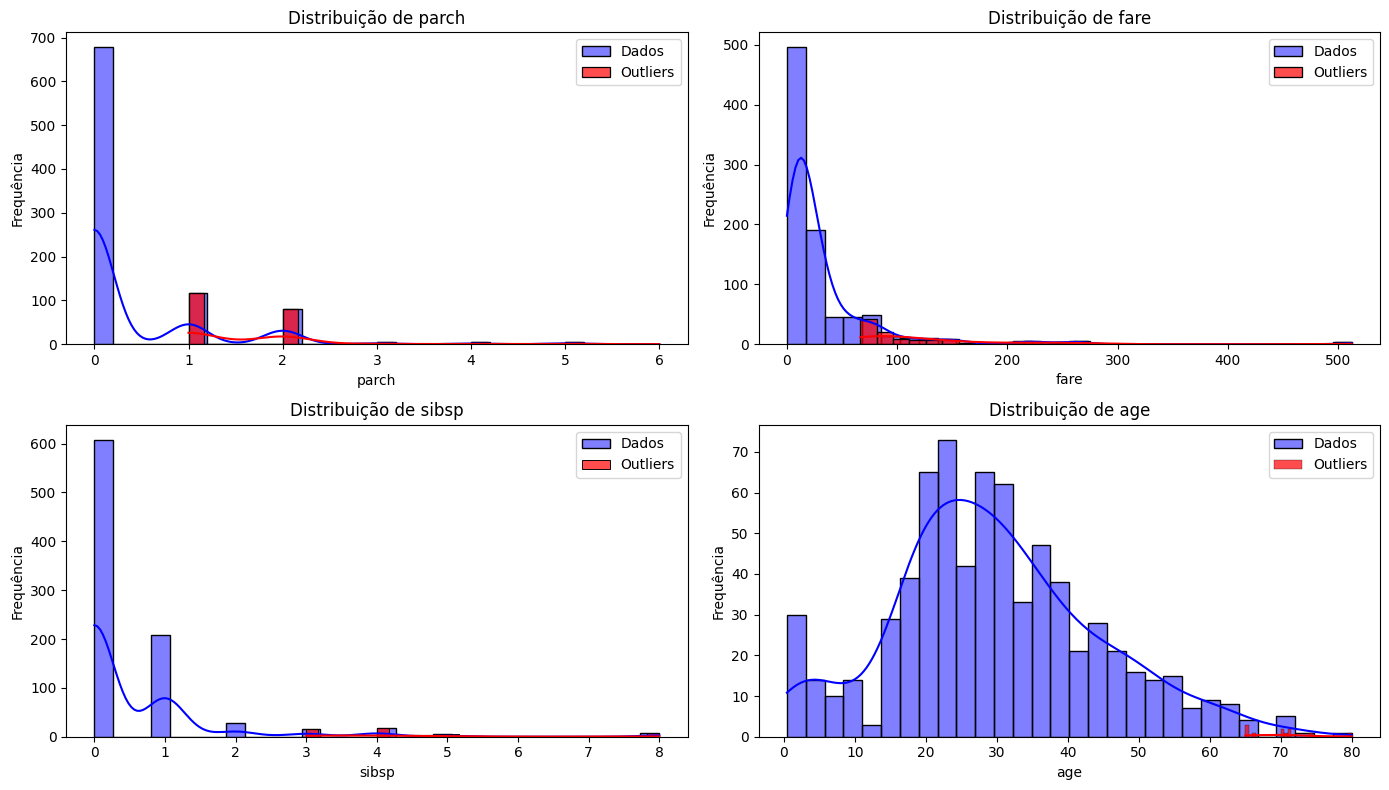

In [122]:
# Identificando e Visualizando Outliers

numeric_df = df.select_dtypes(include=[np.number])

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Aplicando a função a todas as colunas numéricas

outliers = numeric_df.apply(detect_outliers_iqr)

# Filtrando colunas que possuem outliers

outliers_summary = outliers.sum().sort_values(ascending=False)
columns_with_outliers = outliers_summary[outliers_summary > 0].index

print("Número de outliers por coluna: \n")
print(outliers_summary[columns_with_outliers])
display(numeric_df[columns_with_outliers].head())

# Visualização gráfica apenas para as colunas com outliers

num_cols = len(columns_with_outliers)
num_rows = (num_cols + 1) // 2
plt.figure(figsize=(14, num_rows * 4))

for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(numeric_df[column], bins=30, kde=True, color='blue', label='Dados')
    sns.histplot(numeric_df[column][outliers[column]], bins=30, kde=True, color='red', label='Outliers', alpha=0.7)
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.legend()

plt.tight_layout()
plt.show()

* Os dados mostram que as colunas `parch` e `fare` têm mais outliers, enquanto `age` e `sibsp` têm menos.

#### **2.2.1 Tratamento de dados com outliers**

* Após realizar alguns testes, constatou-se que tratar os dados discrepantes poderia causar distorções no número de registros e prejudicar o pipeline na etapa de pré-processamento de dados do modelo. Portanto, decidiu-se inicialmente manter os outliers identificados para este estudo.

#### **2.3. Tratamento de dados discrepantes**

In [123]:
# Tratamento de dados discrepantes

# Pipeline para variáveis nominais

nominal_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='most_frequent')),  # Tratamento de dados faltantes
    ('encoding', OneHotEncoder(sparse_output=False, drop='first')),  # Codificação de variáveis
    ('normalization', StandardScaler())  # Normalização de dados
])

# Pipeline para variáveis ordinais

ordinal_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='most_frequent')),  # Tratamento de dados faltantes
    ('encoding', OrdinalEncoder())  # Codificação ordinal
])

# Pipeline para variáveis discretas

discrete_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='most_frequent')),  # Tratamento de dados faltantes
    ('normalization', StandardScaler())  # Normalização de dados
])

# Pipeline para variáveis contínuas
continuous_preprocessor = Pipeline([
    ('missing', SimpleImputer(strategy='mean')),  # Tratamento de dados faltantes
    ('normalization', StandardScaler())  # Normalização de dados
])

# Combinação dos pipelines em um ColumnTransformer
preprocessor = ColumnTransformer([
    ('nominal', nominal_preprocessor, nominal_columns),
    ('ordinal', ordinal_preprocessor, ordinal_columns),
    ('discrete', discrete_preprocessor, discrete_columns),
    ('continuous', continuous_preprocessor, continuous_columns),
])

* Configura-se o processo de pré-processamento de dados, utilizando pipelines distintos para diferentes tipos de variáveis. 

* Variáveis nominais passam por imputação de valores faltantes, codificação em one-hot e normalização. Variáveis ordinais são tratadas com imputação e codificação ordinal. 

* Variáveis discretas são submetidas a imputação e normalização, enquanto variáveis contínuas recebem imputação com a média e normalização.

* Todos esses pipelines são combinados em um `ColumnTransformer`, que aplica as transformações apropriadas a cada grupo de variáveis, conforme suas características.

In [124]:
# Aplicando o pipeline de pré-processamento aos dados X

X_transformed = preprocessor.fit_transform(X)
X_transformed.shape

(891, 8)

In [125]:
# Verificando se ainda existem dados faltantes

np.isnan(X_transformed).sum()

0

* O pipeline de pré-processamento foi aplicado ao conjunto de dados `X`, transformando as variáveis nominais e contínuas de acordo com as etapas definidas anteriormente. 

* Após a transformação, foi verificado que não há mais dados faltantes, com a soma de valores `NaN` resultando em 0.

### **3. Modelagem Preditiva**

#### **3.1. Seleção de Modelos**

Vamos avaliar quatro modelos de aprendizado de máquina por meio de um processo de validação, com o objetivo de identificar qual deles apresenta o melhor desempenho no conjunto de dados em análise. Os modelos a serem analisados incluem:

**1. K-Nearest Neighbors (KNN):** Um modelo que classifica dados com base na proximidade dos seus vizinhos mais próximos. É eficaz em cenários com padrões claros, mas pode ser afetado por outliers e ruído.
  
**2. Gradient Boosting:** Um modelo de ensemble que constrói uma sequência de árvores de decisão, onde cada árvore corrige os erros da anterior. É conhecido por seu alto desempenho em diversos problemas, mas pode ser sensível a hiperparâmetros e exige ajustes finos.
  
**3. Decision Tree:** Um modelo que utiliza uma estrutura de árvore para tomar decisões com base em condições simples. É fácil de interpretar e ajustar, mas pode se ajustar excessivamente aos dados, especialmente se não for podado.
  
**4. Random Forest Classifier:** Um modelo de ensemble que combina múltiplas árvores de decisão para melhorar a robustez e a precisão. É menos propenso a overfitting do que uma única árvore, mas pode ser menos interpretável devido à complexidade do ensemble.
  
**Para cada um desses modelos, experimentaremos diferentes conjuntos de hiperparâmetros, a fim de encontrar a configuração mais eficaz.**

As métricas que utilizaremos para avaliar a performance dos modelos são:

- **Acurácia (Accuracy):** A proporção de previsões corretas em relação ao total de previsões feitas pelo modelo, refletindo a eficácia geral do modelo em classificar os dados corretamente.

- **Precisão (Precision):** A porcentagem de casos identificados como positivos que são realmente positivos, indicando a precisão das previsões positivas feitas pelo modelo.

- **Recall:** A porcentagem de casos positivos reais que foram corretamente identificados pelo modelo, medindo sua capacidade de detectar todos os casos positivos disponíveis.

- **F1-score:** Uma métrica que combina precisão e recall em uma única medida, fornecendo uma média ponderada que é especialmente útil quando há desequilíbrio entre as classes, pois considera tanto os falsos positivos quanto os falsos negativos.

**Essas métricas nos permitirão comparar os modelos de forma abrangente, identificando qual deles é mais adequado para o conjunto de dados em análise.**

In [126]:
# Configurações do experimento

n_splits_comparative_analysis = 10
n_folds_grid_search = 5
test_size = .2
random_state = 42
scoring = 'accuracy'
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# model settings
max_iter = 1000
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier(), {"n_neighbors": range(3, 20, 2), 'weights': ['uniform', 'distance']}),
     ('Gradient Boosting', GradientBoostingClassifier(random_state=random_state), {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    ('Decision Tree',  DecisionTreeClassifier(random_state=random_state), {'criterion':['gini','entropy'],'max_depth': [3, 6, 8]}),
    ('Random Forest',  RandomForestClassifier(random_state=random_state), {'criterion':['gini','entropy'],'max_depth': [3, 6, 8], 'n_estimators': [10, 30]}),
]

* Esta configuração define um experimento para avaliar modelos de aprendizado de máquina, especificando a divisão dos dados, métricas de avaliação (acurácia, precisão, recall e F1-score), e configurações de hiperparâmetros para K-Nearest Neighbors, Gradient Boosting, Decision Tree e Random Forest. 

* O experimento utiliza 10 splits para análise comparativa, 5 folds para busca em grid e 20% dos dados para teste.

In [127]:
# Configuração para Avaliação de Modelos de Aprendizado de Máquina com Divisão de Dados e Hiperparâmetros

results = pd.DataFrame({})
cross_validate_grid_search = KFold(n_splits=n_folds_grid_search)
cross_validate_comparative_analysis = ShuffleSplit(n_splits=n_splits_comparative_analysis, test_size=test_size, random_state=random_state)
for model_name, model_object, model_parameters in models:
    print(f"running {model_name}...")
    model_grid_search = GridSearchCV(
        estimator=model_object,
        param_grid=model_parameters,
        scoring=scoring,
        n_jobs=-1,
        cv=cross_validate_grid_search
    )
    approach = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_grid_search)
    ])
    scores = cross_validate(
        estimator=approach,
        X=X,
        y=y,
        cv=cross_validate_comparative_analysis,
        n_jobs=-1,
        scoring=metrics
    )
    scores_df = pd.DataFrame(scores)
    aggregated_scores = scores_df.agg(['mean', 'std'])
    aggregated_scores['model_name'] = model_name
    display(aggregated_scores)
    results = pd.concat([results, aggregated_scores], ignore_index=True)

running K-Nearest Neighbors...


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,model_name
mean,15.126256,0.457628,0.820112,0.820132,0.795241,0.802808,K-Nearest Neighbors
std,2.309049,0.173410,0.029655,0.030454,0.036222,0.035158,K-Nearest Neighbors


running Gradient Boosting...


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,model_name
mean,530.135077,0.246396,0.821229,0.824504,0.795736,0.803484,Gradient Boosting
std,165.710838,0.062923,0.027242,0.028286,0.032988,0.032527,Gradient Boosting


running Decision Tree...


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,model_name
mean,1.588404,0.21632,0.820112,0.820100,0.798864,0.804412,Decision Tree
std,0.151644,0.04933,0.023819,0.021457,0.029763,0.027497,Decision Tree


running Random Forest...


,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro,model_name
mean,32.238210,0.231219,0.814525,0.818373,0.787568,0.795839,Random Forest
std,1.690489,0.049983,0.025233,0.027033,0.028347,0.027661,Random Forest


In [128]:
# Destaca-se os Melhores Desempenhos em Resultados de Modelos

def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.nanmin(s.values), props, '')
        return np.where(s == np.nanmax(s.values), props, '')

display(Markdown("### 3.2. Resultados gerais"))
(
    results
    .groupby('model_name')
    .agg(['mean', 'std']).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)

### 3.2. Resultados gerais

   - **Decision Tree** é o mais rápido em termos de tempo de ajuste (`fit_time`), seguido pelo **K-Nearest Neighbors** e **Random Forest**. O **Gradient Boosting** é significativamente mais lento, com um tempo médio de ajuste muito superior aos outros modelos.
   
   - Em termos de tempo de previsão (`score_time`), o **K-Nearest Neighbors** leva mais tempo para fazer previsões em comparação com os outros modelos, especialmente o Decision Tree, que é o mais rápido. O Gradient Boosting e o Random Forest têm tempos de previsão similares e mais baixos que o KNN.

   - Todos os modelos apresentam desempenho muito próximo nas métricas de avaliação, como acurácia, precisão macro, recall macro e F1-score macro, com diferenças mínimas entre eles. Isso indica que, em termos de desempenho, não há um claro vencedor entre os modelos.
   
   - O **Gradient Boosting** e o **K-Nearest Neighbors** têm uma ligeira vantagem nas métricas de precisão macro e F1-score macro, mas essa diferença é pequena, sugerindo que o desempenho é comparável.

   - Os desvios padrão para todas as métricas são similares entre os modelos, indicando uma variação consistente nas previsões de cada modelo. Isso sugere que todos os modelos têm estabilidade comparável em suas previsões.

#### 3.3. Persistência do Modelo